<center> <h1><u>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</u></h1>
</center>


* Name: B.S.V.W.Munasinghe
* Index Number: 190397E

## Connected Component Analysis

<b>(1) Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. </b>

In [1]:
#Importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

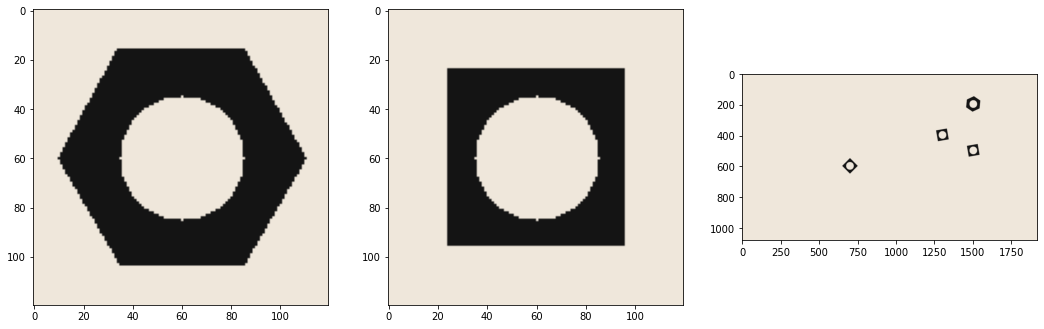

In [26]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

images = [hexnut_template,squarenut_template,conveyor_f100]

fig, ax = plt. subplots(1,3,figsize=(18,6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

<b>(2) Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.</b>

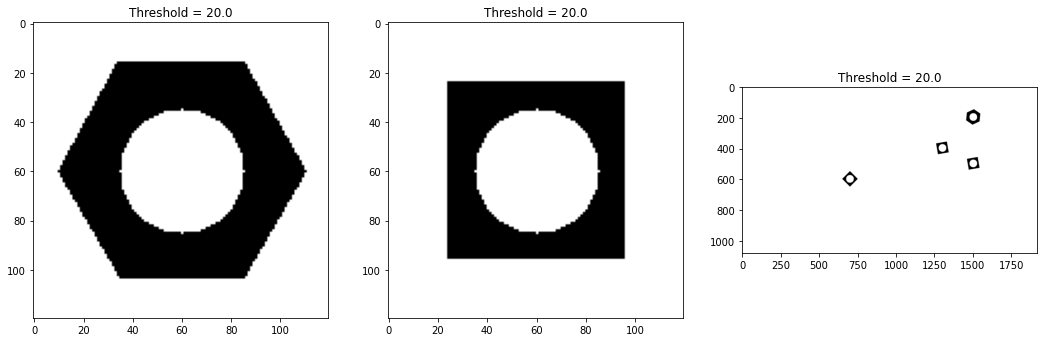

In [3]:
hexnut_grey = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_grey =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_grey =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)
conveyor_f101_grey =  cv.imread('conveyor_f101.png', cv.IMREAD_GRAYSCALE)

greys = [hexnut_grey,squarenut_grey,conveyor_f100_grey]

otsu_images = []
fig, ax = plt. subplots(1,3,figsize=(18,6))

for i in range(3):    
    val,th = cv.threshold(greys[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    otsu_images.append(th)
    ax[i].imshow(cv.cvtColor(th, cv.COLOR_RGB2BGR))
    ax[i].set_title("Threshold = "+str(val))
  
plt.show()

<b>(3) Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.</b>

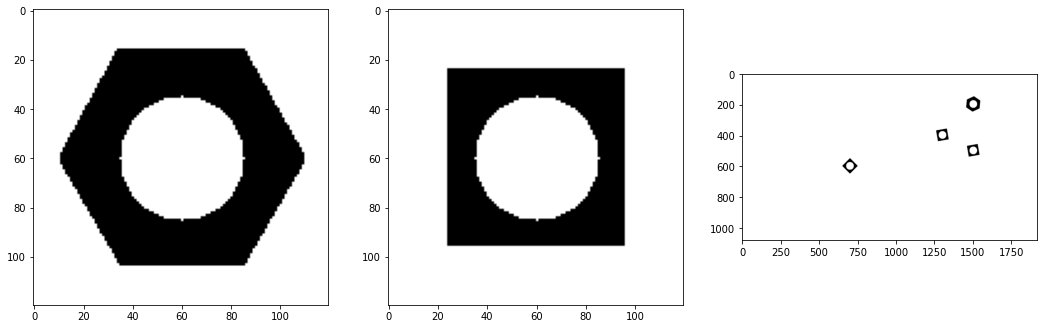

In [32]:
morph_kernal = np.ones((3,3),np.uint8)
morph_images = []

fig, ax = plt. subplots(1,3,figsize=(18,6))

for i in range(3):    
    m1 = cv.morphologyEx(otsu_images[i], cv.MORPH_CLOSE, morph_kernal)
    morph_images.append(m1)
    ax[i].imshow(cv.cvtColor(m1, cv.COLOR_RGB2BGR))
    
  
plt.show()



<b>(4) Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
* How many connected components are detected in each image?
* What are the statistics? Interpret these statistics.
* What are the centroids?</b>


>> Image Name: Hexnut Template
	-> Number of conected components: 3
	-> Statistics: 
	Left  	Top  	Width  	Height   Area	Centroid
	 11 	 16 	 99 	 88 	 4722 	( 59.83354510800508 , 59.22257518000847 )
	 0 	 0 	 120 	 120 	 7717 	( 59.168847997926655 , 59.54269793961384 )
	 35 	 35 	 51 	 51 	 1961 	( 60.0 , 60.0 )

>> Image Name: Squarenut Template
	-> Number of conected components: 3
	-> Statistics: 
	Left  	Top  	Width  	Height   Area	Centroid
	 24 	 24 	 72 	 72 	 3223 	( 59.19578032888613 , 59.19578032888613 )
	 0 	 0 	 120 	 120 	 9216 	( 59.5 , 59.5 )
	 35 	 35 	 51 	 51 	 1961 	( 60.0 , 60.0 )

>> Image Name: Conveyor f100
	-> Number of conected components: 6
	-> Statistics: 
	Left  	Top  	Width  	Height   Area	Centroid
	 651 	 151 	 895 	 499 	 13930 	( 1275.0211055276382 , 400.110839913855 )
	 0 	 0 	 1920 	 1080 	 2051826 	( 956.2473406614401 , 540.8840496221414 )
	 1475 	 175 	 51 	 51 	 1961 	( 1500.0 , 200.0 )
	 1275 	 375 	 51 	 51 	 1961 	( 1300.0 , 400.0 )
	 1475 	 475 	

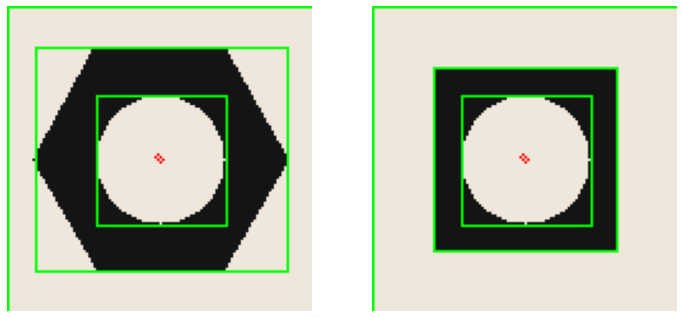

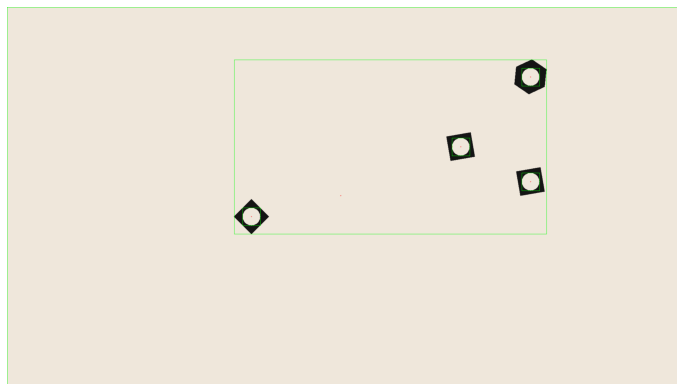

In [38]:
outputs = []
names = ['Hexnut Template','Squarenut Template','Conveyor f100']

fig, ax = plt.subplots(1,2,figsize=(12,6)) 
fig2,ax2 = plt.subplots(figsize=(12,12)) 
for i in range(3):
    
    (no_Labels, labels, stats, centroids) = cv.connectedComponentsWithStats(morph_images[i], 4, cv.CV_32S)
    outputs.append((numLabels, labels, stats, centroids))
    
    print(">> Image Name: " + names[i]+"\n\t-> Number of conected components: "+str(no_Labels))
    print("\t-> Statistics: ")
    print("\tLeft  \tTop  \tWidth  \tHeight   Area\tCentroid")
    
    output = images[i].copy()
       
    for j in range(no_Labels):
        x = stats[j, cv.CC_STAT_LEFT]
        y = stats[j, cv.CC_STAT_TOP]
        w = stats[j, cv.CC_STAT_WIDTH]
        h = stats[j, cv.CC_STAT_HEIGHT]
        area = stats[j, cv.CC_STAT_AREA]
        (cX, cY) = centroids[j]
        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv.circle(output, (int(cX), int(cY)), 1, (0, 0, 255), 1)
        print("\t",x,"\t",y,"\t",w,"\t",h,"\t",area,"\t(",cX,",",cY,")")
    if i<2:
        ax[i].imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))
        ax[i].axis('off')  
    else:
        ax2.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))
        ax2.axis('off')
    print("")


<b>(5) Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.</b>